In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

In [2]:
iris = load_iris(as_frame=True)
df = iris.frame

In [3]:
print("=== Decision Tree on Iris Dataset ===")
print(f"Dataset shape: {df.shape}")

=== Decision Tree on Iris Dataset ===
Dataset shape: (150, 5)


In [4]:
print("\nFirst 5 rows of dataset:")
print(df.head())


First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


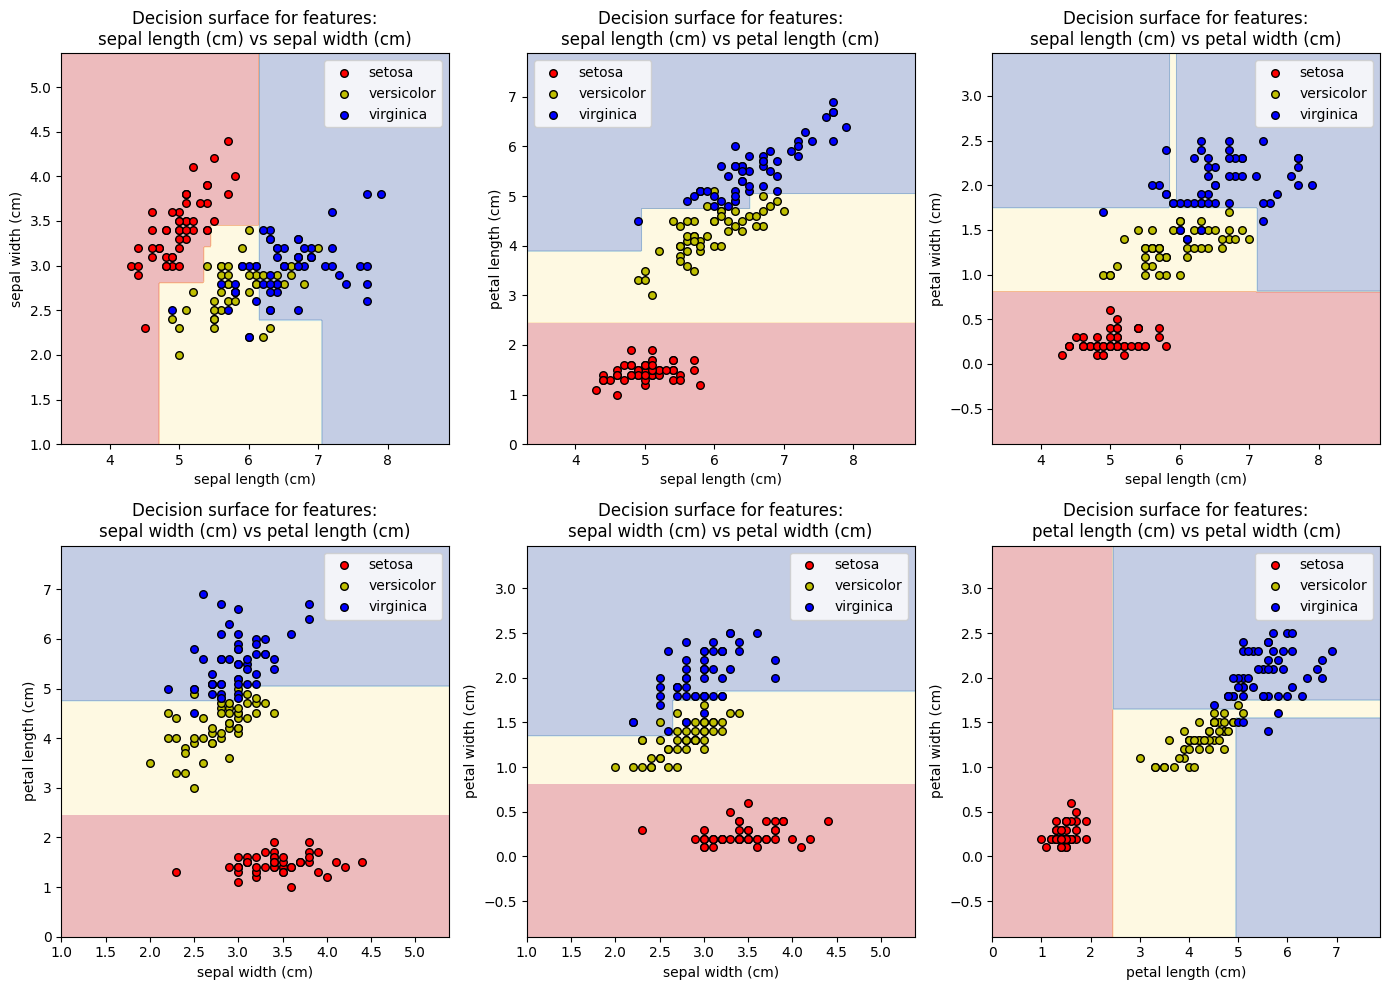

In [7]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

if not np.issubdtype(y.dtype, np.number):
    le = LabelEncoder()
    y = le.fit_transform(y)
    target_names = le.classes_
else:
    target_names = iris.target_names


plot_colors = "ryb"
plot_step = 0.02

feature_names = iris.feature_names
pairs = list(combinations(range(X.shape[1]), 2))


plt.figure(figsize=(14, 10))
for i, (f1, f2) in enumerate(pairs):
    X_pair = X[:, [f1, f2]]

    clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
    clf.fit(X_pair, y)

    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    for idx, color in zip(range(3), plot_colors):
        plt.scatter(
            X_pair[y == idx, 0],
            X_pair[y == idx, 1],
            c=color,
            label=target_names[idx],
            edgecolor="k",
            s=30
        )

    plt.xlabel(feature_names[f1])
    plt.ylabel(feature_names[f2])
    plt.title(f"Decision surface for features:\n{feature_names[f1]} vs {feature_names[f2]}")
    plt.legend(loc="best")

plt.tight_layout()

In [8]:
clf_full = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf_full.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

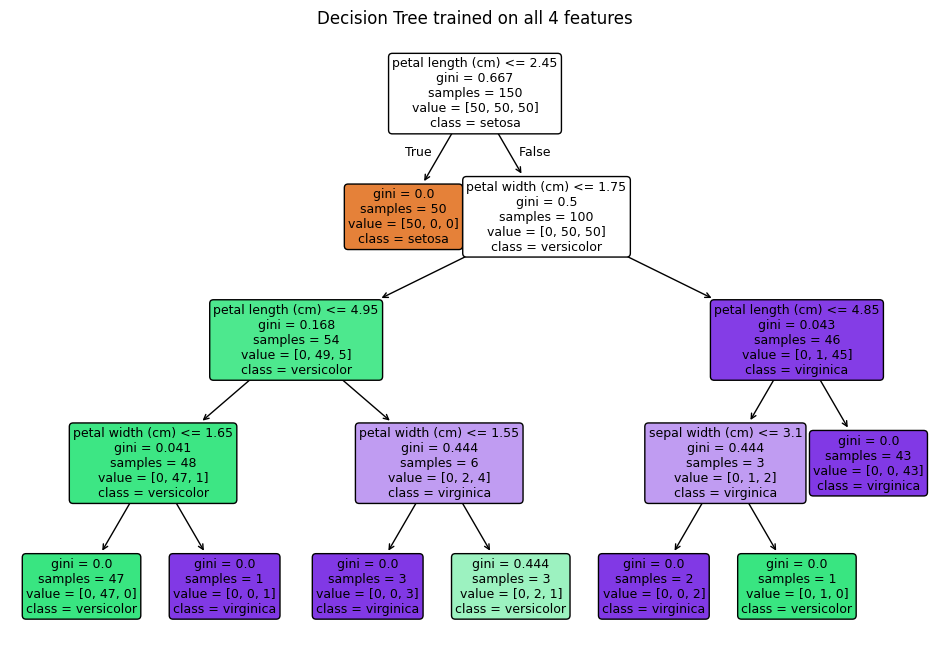

In [9]:
plt.figure(figsize=(12, 8))
plot_tree(
    clf_full,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    fontsize=9,
)
plt.title("Decision Tree trained on all 4 features")

plt.show()